In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [17]:
url_1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data=pd.read_csv(url_1)

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [18]:
url_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(url_2)

X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [19]:
Y = data['Class'].to_numpy()
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
print(type(Y))
print(type(data['Class']))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [21]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
Y_test.shape

(18,)

In [24]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr = LogisticRegression()

In [26]:
logreg_cv = GridSearchCV(
    estimator=lr, 
    param_grid=parameters, 
    cv=10  # 10-fold cross-validation
)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [27]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [28]:
from sklearn.metrics import accuracy_score

test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test Accuracy (using score):", test_accuracy)

Test Accuracy (using score): 0.8333333333333334


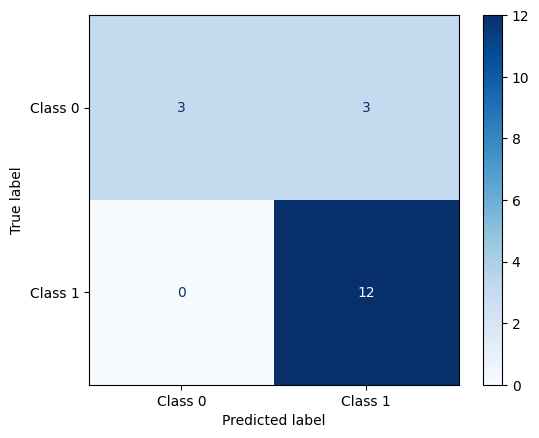

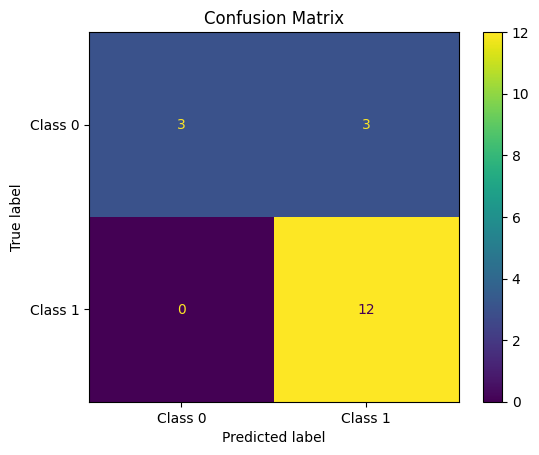

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Generate predictions
yhat = logreg_cv.predict(X_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    logreg_cv, 
    X_test, 
    Y_test,
    display_labels=['Class 0', 'Class 1'],  # Optional class labels
    cmap=plt.cm.Blues
)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Define the parameter grid
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),       # [0.001, 0.1, 1, 10, 1000]
    'gamma': np.logspace(-3, 3, 5)     # [0.001, 0.1, 1, 10, 1000]
}

# Initialize SVM
svm = SVC()

# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',  # or other metrics like 'f1', 'roc_auc'
    n_jobs=-1           # Use all CPU cores for faster computation
)

# Fit GridSearchCV to find the best parameters
svm_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", svm_cv.best_params_)
print("Best Cross-Validation Accuracy:", svm_cv.best_score_)

Best Parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best Cross-Validation Accuracy: 0.8482142857142856


In [32]:
test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8333


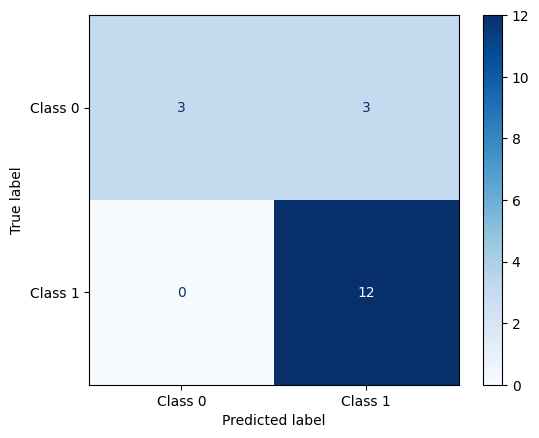

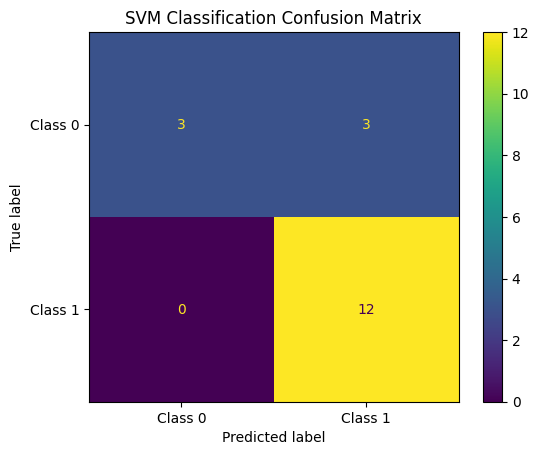

In [33]:
# Generate predictions
y_pred = svm_cv.predict(X_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    svm_cv,                      # Your trained model
    X_test,                      # Test features
    Y_test,                      # True test labels
    display_labels=['Class 0', 'Class 1'],  # Optional class names
    cmap='Blues',                # Color scheme
    values_format='d'            # Display integers
)

disp.plot()
plt.title('SVM Classification Confusion Matrix')
plt.show()

In [37]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],  # [2, 4, 6, ..., 18]
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

In [40]:
# Create GridSearchCV object with optimal settings
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,                      # 10-fold cross-validation
    scoring='accuracy',          # Scoring metric
    n_jobs=-1,                  # Use all available cores
    verbose=1                   # Shows progress
)

# Fit the model (now guaranteed to work with these parameters)
tree_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'splitter': ['best']},
             scoring='accuracy', verbose=1)

In [41]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8482142857142858


In [42]:
test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8333


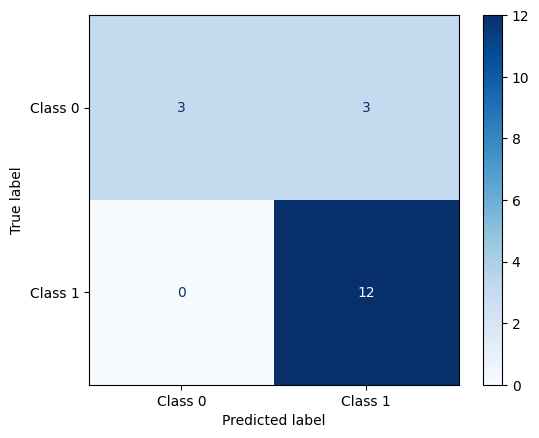

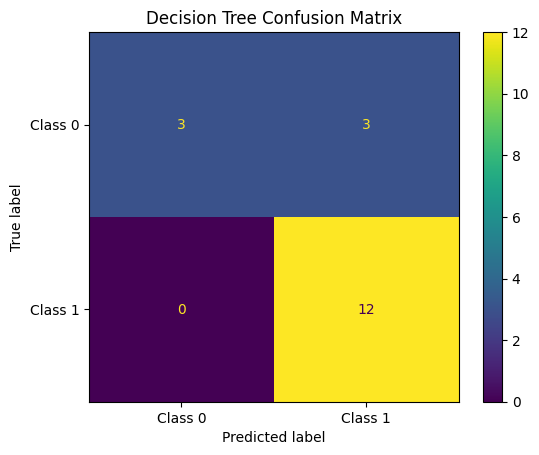

In [43]:
# Generate predictions
yhat = tree_cv.predict(X_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    tree_cv, 
    X_test,
    Y_test,
    display_labels=['Class 0', 'Class 1'],  # Custom class names
    cmap='Blues',
    values_format='d'  # Integer formatting
)

disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [44]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [45]:
# Create GridSearchCV object
knn_cv = GridSearchCV(
    estimator=KNN,
    param_grid=parameters,
    cv=10,                   # 10-fold cross-validation
    scoring='accuracy',       # Evaluation metric
    n_jobs=-1,               # Use all available CPU cores
    verbose=1                # Show progress messages
)

# Fit the model to find optimal parameters
knn_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [46]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [47]:
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Test Accuracy: 0.8333


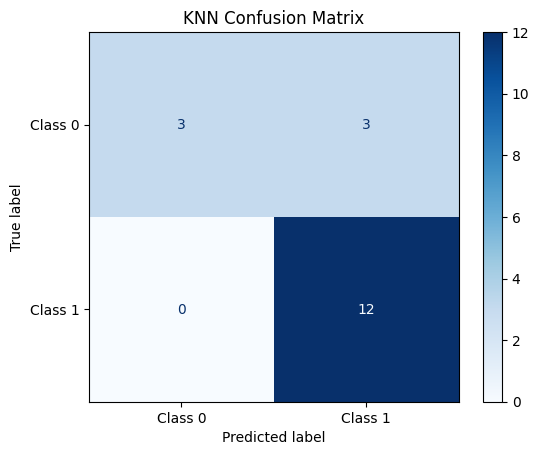

In [48]:
# Generate predictions
yhat = knn_cv.predict(X_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    Y_test, 
    yhat,
    display_labels=['Class 0', 'Class 1'],  # Custom class names
    cmap='Blues',
    values_format='d'  # Integer format
)

plt.title('KNN Confusion Matrix')
plt.show()

In [54]:
models = {
    "Logistic Regression": logreg_cv,
    "SVM": svm_cv,
    "Decision Tree": tree_cv,
    "KNN": knn_cv
}

for name, model in models.items():
    test_acc = model.score(X_test, Y_test)
    print(f"{name}: Test Accuracy = {test_acc:.4f}")

Logistic Regression: Test Accuracy = 0.8333
SVM: Test Accuracy = 0.8333
Decision Tree: Test Accuracy = 0.8333
KNN: Test Accuracy = 0.8333
